In [15]:
import torch
from torch import nn
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
## known variables

weight = 0.7
bias = 0.3

## creating a linear model
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [19]:
model_0 = LinearRegressionModel()

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1676])), ('bias', tensor([-1.4002]))])

In [21]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01)

In [22]:
epochs_count = []
train_loss_count = []
test_loss_count = []

epochs = 500

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0.forward(X_train)

    loss_train = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        y_test_pred = model_0.forward(X_test)

        loss_test = loss_fn(y_test_pred, y_test)

    if epoch % 10 == 0:
        epochs_count.append(epoch)
        train_loss_count.append(loss_train)
        test_loss_count.append(loss_test)
        print(f"Epoch = {epoch} | loss = {loss_test} | params = {model_0.state_dict}")



    

Epoch = 0 | loss = 2.068366527557373 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 10 | loss = 1.9460880756378174 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 20 | loss = 1.8238097429275513 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 30 | loss = 1.7015310525894165 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 40 | loss = 1.5792524814605713 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 50 | loss = 1.4569740295410156 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 60 | loss = 1.3346956968307495 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 70 | loss = 1.2124171257019043 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 80 | loss = 1.0901386737823486 | params = <bound method Module.state_dict of LinearRegressionModel()>
Epoch = 90 |

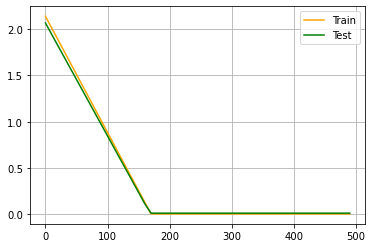

In [24]:
plt.plot(epochs_count, np.array(torch.tensor(train_loss_count).numpy()), label = "Train", color = "orange")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_count).numpy()), label = "Test", color = "green")
plt.grid()
plt.legend()

In [25]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

FILE_NAME = "Independent_model_save.pt"

FILE_SAVE_PATH = MODEL_PATH / FILE_NAME

torch.save(obj= model_0.state_dict(), f=FILE_SAVE_PATH)

In [26]:
my_model_back = LinearRegressionModel()

my_model_back.load_state_dict(torch.load(FILE_SAVE_PATH))

<All keys matched successfully>

In [27]:
my_model_back.state_dict() == model_0.state_dict()

True